In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets,metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 100)

In [22]:
dataRaw = datasets.load_diabetes()
data = pd.DataFrame(dataRaw['data'],columns=dataRaw['feature_names'])
data['Disease_progression'] = dataRaw['target']
print (dataRaw['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

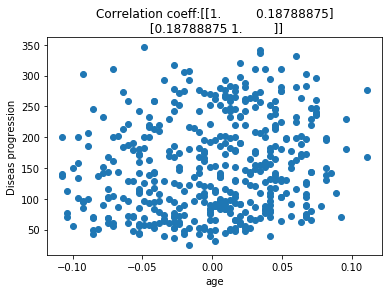

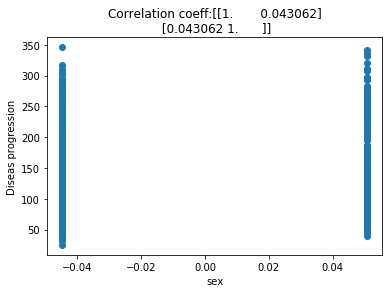

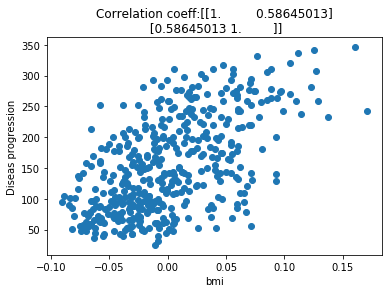

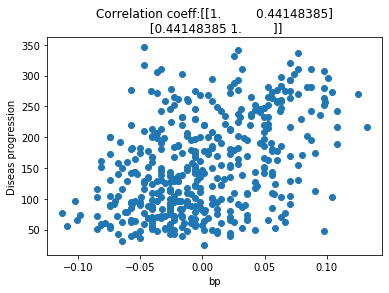

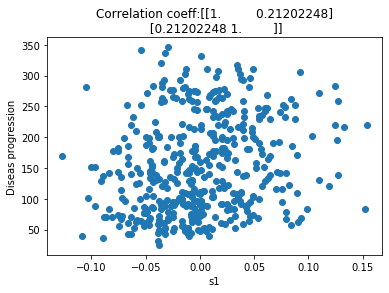

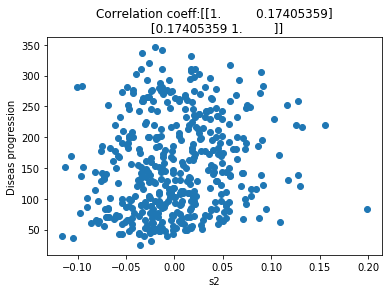

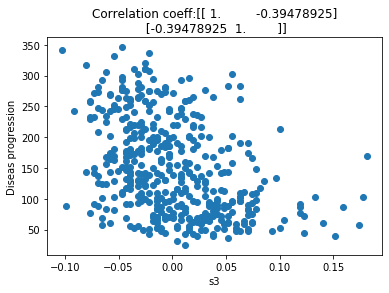

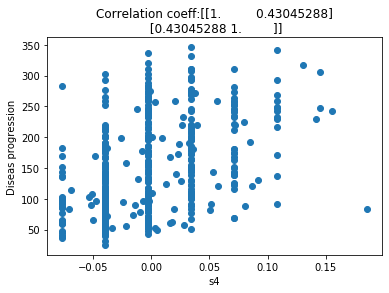

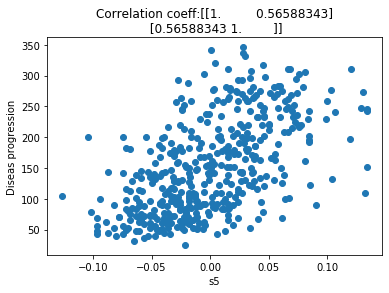

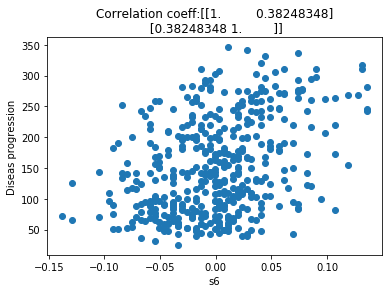

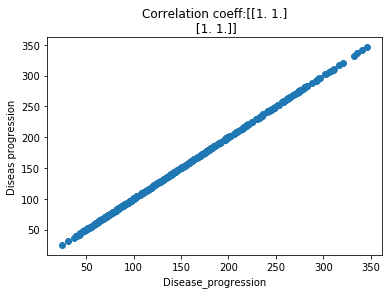

In [28]:
variables = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
target = 'Disease_progression'
for i in data.keys():
    plt.plot(data[i],data[target],'o')
    plt.ylabel('Diseas progression')
    plt.xlabel(i)
    plt.title('Correlation coeff:'+str(np.corrcoef(data[i],data[target])))
    plt.show()

In [35]:
data['Intercept'] = 1
linear_regression = sm.OLS(data[target],data[['Intercept',]+variables]).fit()

In [36]:
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Disease_progression   R-squared:                       0.518
Model:                             OLS   Adj. R-squared:                  0.507
Method:                  Least Squares   F-statistic:                     46.27
Date:                 Thu, 10 Oct 2019   Prob (F-statistic):           3.83e-62
Time:                         18:06:29   Log-Likelihood:                -2386.0
No. Observations:                  442   AIC:                             4794.
Df Residuals:                      431   BIC:                             4839.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

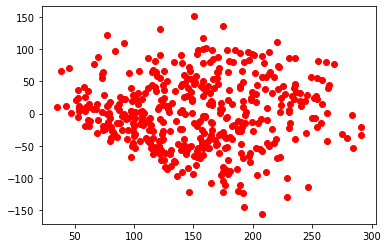

In [66]:
data['pred'] = linear_regression.predict(data[['Intercept',]+variables])
plt.plot(data['pred'],data[target]-data['pred'],'ro');plt.show()


In [62]:
metrics.mean_squared_error(data['pred'],data[target])**2/442

18501.87596562502

In [58]:
np.mean ( (data['pred']-data[target])**2)**.5


53.47607314274362